<a href="https://colab.research.google.com/github/thj0309/thj0309.bigdata.github.io/blob/main/thj0309.bigdata.github.io/2_fastcampus/1_02_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
from matplotlib import pyplot as plt
#matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
##Local PC
# path = "../data/movielens"

# Google Colab : 데이터 경로 설정
path = '/content/drive/MyDrive/Colab Notebooks/fastcampus/data/movielens/'

In [13]:
os.listdir(path)

['ratings.csv', 'tags.csv', 'movies.csv', 'links.csv', 'README.txt']

In [15]:
ratings_df = pd.read_csv(os.path.join(path + 'ratings.csv'), encoding='utf-8')
tags_df = pd.read_csv(os.path.join(path + 'tags.csv'), encoding='utf-8')
movies_df = pd.read_csv(os.path.join(path + 'movies.csv'), index_col='movieId', encoding='utf-8')

In [16]:
print(ratings_df.shape)
print(ratings_df.head())

(100836, 4)
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [17]:
print(tags_df.shape)
print(tags_df.head())

(3683, 4)
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200


In [18]:
print(movies_df.shape)
print(movies_df.head())

(9742, 2)
                                      title                                       genres
movieId                                                                                 
1                          Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
2                            Jumanji (1995)                   Adventure|Children|Fantasy
3                   Grumpier Old Men (1995)                               Comedy|Romance
4                  Waiting to Exhale (1995)                         Comedy|Drama|Romance
5        Father of the Bride Part II (1995)                                       Comedy


In [19]:
# 평점 데이터의 기초 통계량

In [23]:
n_unique_users = len(ratings_df['userId'].unique())
print(n_unique_users)

610


In [28]:
list(ratings_df['userId'].values)[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [22]:
n_unique_movies = len(ratings_df['movieId'].unique())
print(n_unique_movies)

9724


In [29]:
print('평점의 평균 : ', ratings_df['rating'].mean())
print('평점의 표준편차 : ', ratings_df['rating'].std())

평점의 평균 :  3.501556983616962
평점의 표준편차 :  1.0425292390605359


In [30]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [31]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [32]:
# NAN 값이 있는지 확인한다
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff71ff42c18>,
      dtype=object)

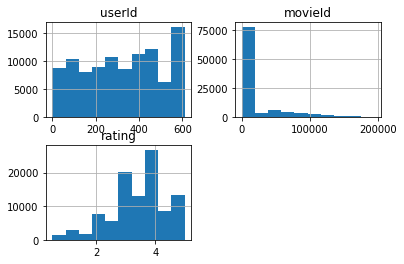

In [33]:
ratings_df[['userId', 'movieId', 'rating']].hist()